In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense1 = nn.Linear(8, 64)
        self.dense2 = nn.Linear(64, 32)
        self.dense3 = nn.Linear(32, 4)

        nn.init.zeros_(self.dense1.bias)
        nn.init.zeros_(self.dense2.bias)
        nn.init.zeros_(self.dense3.bias)
        
        nn.init.kaiming_normal_(self.dense1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.dense2.weight, nonlinearity='relu')
        with torch.no_grad():
            self.dense3.weight *= 0.1

    def forward(self, x):
        x = F.relu(self.dense1(x))
        x = F.relu(self.dense2(x))
        x = F.softmax(self.dense3(x), dim=1)
        return x

In [ ]:
from trainer import Reinforce
import gymnasium as gym

EPISODES = 7000

env = gym.make("LunarLander-v3", continuous=False, gravity=-10.0,
               enable_wind=False, wind_power=15.0, turbulence_power=1.5, render_mode='rgb_array')

policy = Model()
optimizer = torch.optim.Adam(policy.parameters(), lr=1e-3)

reinforce = Reinforce(env, policy, optimizer, discount=0.99)
rewards, losses = reinforce.train(episodes=EPISODES, stats_interval=500)

New max of 11.132052155983615 in episode 47
New max of 20.0981024627786 in episode 62
New max of 53.13044220045657 in episode 250
New max of 85.8729941910084 in episode 463
Episodes (0, 499): Avg Loss- -3.102889436008661 Avg Reward- -148.10965900400626
New max of 92.60289342847474 in episode 576
New max of 102.04539825286784 in episode 649
New max of 138.29031882985657 in episode 710
New max of 146.64127743621012 in episode 721
New max of 218.5776579700581 in episode 722
New max of 247.17360125433802 in episode 754
New max of 248.08551838722144 in episode 775
New max of 250.43618254978549 in episode 814
New max of 250.86781293316358 in episode 831
New max of 254.13518341013224 in episode 835
New max of 265.6275497751121 in episode 843
New max of 296.92302961486354 in episode 862
Episodes (500, 999): Avg Loss- -14.01896718010201 Avg Reward- 47.73592014360239
Episodes (1000, 1499): Avg Loss- 2.2997280243100713 Avg Reward- 113.9826628784249
Episodes (1500, 1999): Avg Loss- 15.809708278552

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103659730>>
Traceback (most recent call last):
  File "/Users/varun/Documents/venvs/3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


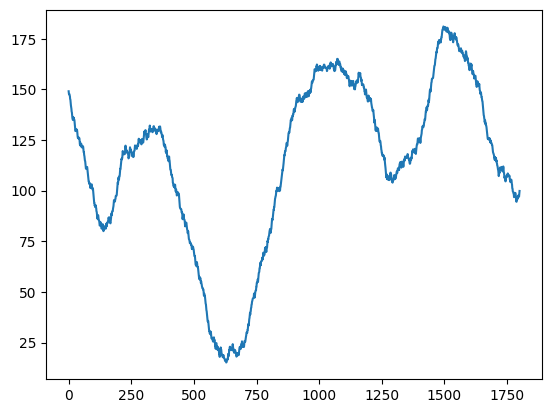

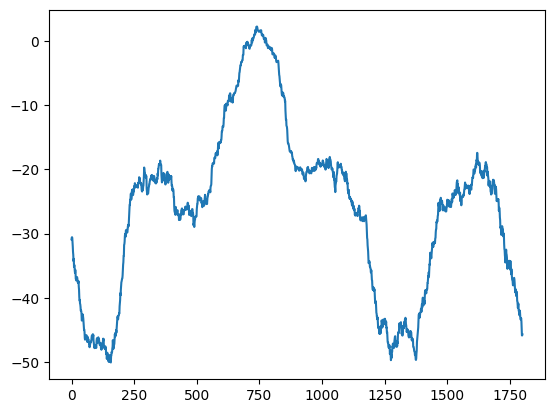

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

plt.figure()
plt.plot(moving_average(rewards, int(EPISODES/10)))
plt.figure()
plt.plot(moving_average(losses, int(EPISODES/10)))

In [13]:
from IPython.display import HTML

HTML(reinforce.playback(fps=30, text_color="white"))

TypeError: Reinforce.playback() got an unexpected keyword argument 'text_color'

In [11]:
reinforce.eval(episodes=500)

Average Return over 500 episodes: 160.66235788246422


In [ ]:
reinforce.save("models/cart_pole/REINFORCE_210")